Ben Kahan  
DS 210  
Homework 4. 
12 October 2022  
Collaborators: None

# Question 1

For standard `*.txt` files, I use `vim` or `nano` to edit them. However, for `Rust`, I will be using Intellij with the `Rust` plugin.  

For version control, I use `git` and GitHub to store my private repositories. 

For example: 

```bash
git init 
mkdir "homework4"
git add homework4/
git commit -m "hw4 dir initial"
cd homework4/ 
vim example.txt # edit the file using vim commands
git add example.txt 
git commit -m "example.txt initial"
git push origin main 
```

# Question 2

In [35]:
%%bash 
rustc --version

rustc 1.64.0 (a55dd71d5 2022-09-19)


In [36]:
%%bash 
cargo --version

cargo 1.64.0 (387270bc7 2022-09-16)


For Jupyter, I installed the Rust Jupyter kernel from Google

# Question 3

In [37]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

In [38]:
A,B = 0,1
domain = [0,1]
samples = 50
x = np.sort(np.random.rand(1,samples))

In [39]:
def minerror(function,x): 
    y = function(x)
    return np.square(x - y)[0]
    
def minabserror(function, x): 
    return np.abs(x - function(x))[0]

In [40]:
L = 1
k = 1
x_0 = 0 

def g(x):
    return 1 / (1 + np.exp(-k*(x-x_0)))


g(0) # This should return .5 as this is a standard sigmoid function 

0.5

In [41]:
me = minerror(g,x)
mae = minabserror(g,x)

In [42]:
def h(x,func1, func2):
    tmp = minerror(g,x) + minabserror(g,x)
    return g(tmp)    


y = h(x,g,g)

In [43]:
y

array([0.67531804, 0.66594923, 0.66217691, 0.65933493, 0.64947561,
       0.64585316, 0.63342817, 0.62411607, 0.62275582, 0.61103771,
       0.60221601, 0.5868495 , 0.58424264, 0.57959577, 0.57155408,
       0.56779578, 0.55457715, 0.55110711, 0.54786476, 0.54499304,
       0.54042187, 0.53486285, 0.53391049, 0.53171693, 0.52416508,
       0.52077034, 0.51980981, 0.51980871, 0.51799131, 0.51655411,
       0.51469394, 0.50789311, 0.5055223 , 0.5041149 , 0.50860413,
       0.52305547, 0.52516568, 0.5257354 , 0.5285137 , 0.53974943,
       0.54480979, 0.54614603, 0.54894693, 0.55074588, 0.57046237,
       0.57216833, 0.57348365, 0.57517661, 0.58029659, 0.58431912])

In [48]:
x = x.reshape(-1,1)

In [63]:
tree = DecisionTreeRegressor(max_leaf_nodes=10)

In [64]:
tree.fit(x, y)

DecisionTreeRegressor(max_leaf_nodes=10)

In [65]:
tree_pred = tree.predict(x)

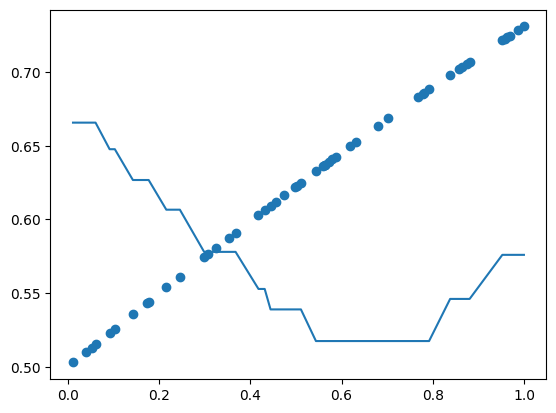

In [66]:
plt.scatter(x,g(x))
plt.plot(x, tree_pred)

# Question 4

In [13]:
x = np.sort(np.random.rand(1,samples).ravel())

In [14]:
def f(x):
    return (np.random.rand()*np.float_power(x,13) + \
            np.random.rand()*np.float_power(x,-.5) + \
            np.random.rand()* np.cos(x) - \
            .5 * np.random.rand() * \
            np.random.normal(size=samples) \
            ).ravel()

In [15]:
y = f(x)

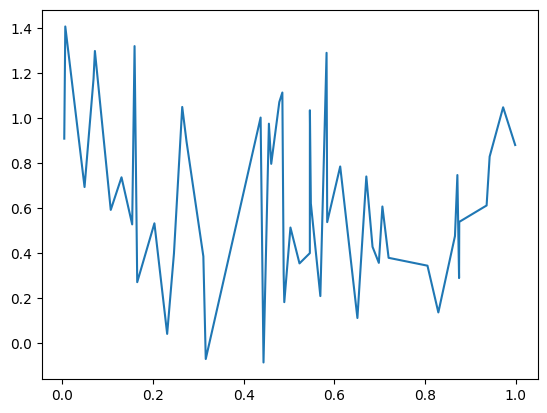

In [16]:
plt.plot(x,y)

In [17]:
def eval_poly(c,x):
    y = np.zeros_like(x)
# What does this inner loop do? 
# ANS: This innerloop indexes for every entry in c
# since c, in this context, is the result of numpy.polyfit(),
# the method returns a numpy array with the indicies representing
# the coefficients of the fit polynomial 
# thus, the for loop separates each coefficient and: 
# y = y*x, multiplies itself (y) by x and adds the coefficient 
# y is an empty array (declared above to alloc mem) 
# y is then returned which contains the modified entries of the new polynomial
    for coeff in c:
        y = y * x + coeff
    return y

In [18]:
over = np.polyfit(x,y,17)
over_res = eval_poly(over,x)
under = np.polyfit(x,y,2)
under_res = eval_poly(under,x)

<Figure size 300x500 with 0 Axes>

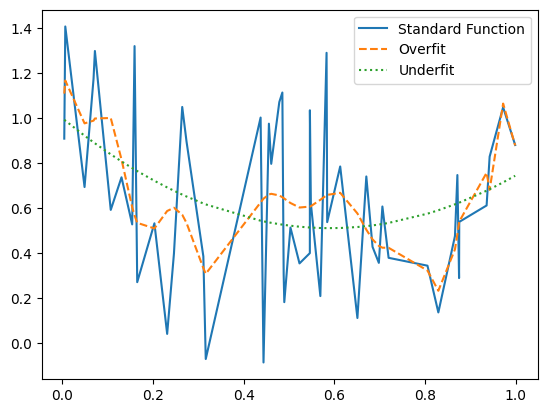

<Figure size 300x500 with 0 Axes>

In [19]:
plt.plot(x,y, label="Standard Function")
plt.plot(x, over_res, label="Overfit", linestyle="--")
plt.plot(x, under_res, label="Underfit", linestyle=":")
plt.legend()
plt.figure(figsize=(3,5))

In [20]:
underfit_var = np.var(under_res)
overfit_var = np.var(over_res)

In [21]:
def mse(x,y):
    return ((x-y)**2).mean()

In [22]:
underfit_mse = mse(x, under_res)
overfit_mse = mse(x, over_res) 

In [23]:
underfit_var, underfit_mse

(0.01853101730737062, 0.16342570398686848)

In [24]:
overfit_var, overfit_mse

(0.04195942359324214, 0.18685445618777707)

We see that the underfitting leads to lower variance (which is expected) and we see greater bias through the mean squared error estimator of the overfit polynomial. 